<h2>KNN Classification</h2>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load the Data</h2>
</div>

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from apyori import apriori

In [180]:
#Reading the data

groceries_df=pd.read_csv(r'C:\Users\Owner\Downloads\Machine Learning\Classification\Groceries_dataset.csv')
print("Total Records: ",len(groceries_df))

Total Records:  38765


In [181]:
groceries_df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [182]:
groceries_df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>EDA and Data Preparation</h2>
</div>

In [183]:
#Checking total null values
groceries_df.isnull().sum().sum()

0

In [184]:
#Checking for duplicates
duplicate = groceries_df[groceries_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))

Total number of duplicated:  759


In [185]:
# data = groceries_df[(groceries_df['Member_number']==3055) & (groceries_df['Date']=='18-08-2015')]

In [186]:
groceries_df = groceries_df.drop_duplicates()
print("Total number of records after dropping duplicates: ",len(groceries_df))

Total number of records after dropping duplicates:  38006


In [187]:
item_count=groceries_df[['Member_number','itemDescription']].groupby('itemDescription',as_index=False)['Member_number'].count(
    ).sort_values(by='Member_number',ascending=False)
item_count.rename(columns = {'Member_number':'count'},inplace=True)
item_count.head()

,itemDescription,count
164,whole milk,2363
102,other vegetables,1827
122,rolls/buns,1646
138,soda,1453
165,yogurt,1285


In [188]:
groceries_df['Date']= pd.to_datetime(groceries_df['Date'])
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
Member_number      38006 non-null int64
Date               38006 non-null datetime64[ns]
itemDescription    38006 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


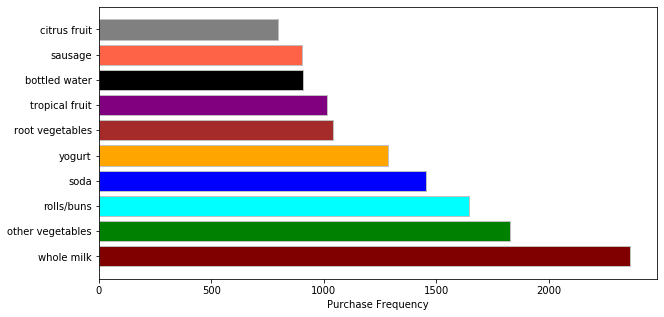

In [189]:
y_axis = item_count['itemDescription'].head(10)
x_axis = item_count['count'].head(10)
plt.figure(figsize=(10,5))
color_list =['maroon','green','cyan','blue','orange','brown','purple','black','tomato','gray']
plt.barh(y_axis,x_axis, edgecolor='Silver',color=color_list)
plt.xlabel('Purchase Frequency')
plt.show()

 The data shows that milk, vegetables, and rolls/buns are the most frequently purchased items.

In [248]:
#Converting each itemset purchased by a memmber on same day.
basket_df = groceries_df.groupby(['Member_number', 'Date'], as_index=True)['itemDescription'].apply(lambda x: list(x))

transactions = basket_df.values.tolist()

transactions[:5]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles']]

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>

In [250]:
#Using apriori to generate itemsets with support,confidence and lift.
association_rules = apriori(transactions,
                            min_support=0.0003,
                            min_lift=2,
                            min_confidence=0.06,
                            min_length=2)
association_results = list(association_rules)
print("Total Associations: ",len(association_results))

Total Associations:  94


In [251]:
#Creating a dataframe out item that have association
results = []
for item in association_results:
    itemset = item[0]
    items = [x for x in itemset]

    value0 = str(items[0]) # Item 1 in itemset
    value1 = str(items[1]) # Item 2 in itemset
    value3 = str(item[1])  # Support of items
    value4 = str(item[2][0][2]) # Confidence of items
    value5 = str(item[2][0][3]) # Lift of items

    rows = (value0, value1, value3, value4, value5)
    results.append(rows)
    columns = ['item_x', 'item_y', 'support', 'confidence', 'lift']

    associations_df = pd.DataFrame(results, columns=columns)

In [252]:
associations_df=associations_df.sort_values(by=['support', 'lift'],
                            ascending=[False, False]).head(100)
associations_df.head(20)

,item_x,item_y,support,confidence,lift
91,yogurt,sausage,0.0014702933903628951,0.1317365269461078,2.1829165589087607
1,brandy,whole milk,0.0008688097306689834,0.34210526315789475,2.1662805978127717
18,tropical fruit,sweet spreads,0.0007351466951814476,0.16176470588235295,2.387066365007542
8,soft cheese,hamburger meat,0.0006014836596939117,0.060000000000000005,2.745504587155964
86,sausage,whole milk,0.0006014836596939117,0.391304347826087,2.4778192791035716
89,rolls/buns,whipped/sour cream,0.0006014836596939117,0.20454545454545456,2.3818004952246197
16,soda,spices,0.0006014836596939117,0.225,2.317050929112182
11,sweet spreads,pip fruit,0.0005346521419501437,0.11764705882352942,2.398301009777208
6,frankfurter,mustard,0.0005346521419501437,0.08695652173913045,2.302885725278954
77,other vegetables,sausage,0.0005346521419501437,0.2758620689655173,2.259290715890003


<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Conclusion</h2>
</div>

In [257]:
#Top item by support
associations_df.sort_values(by='support',ascending=False).head(1)

,item_x,item_y,support,confidence,lift
91,yogurt,sausage,0.0014702933903628951,0.1317365269461078,2.1829165589087607


The itemset of yogurt and sausage are purchased as most frequently.

In [258]:
#Top item by lift
associations_df.sort_values(by='lift',ascending=False).head(1)

,item_x,item_y,support,confidence,lift
54,sausage,curd,0.0003341575887188398,0.5,8.28516057585825


The itemset of sausage and curd have the highest lift value of 8.28 and a relatively high confidence value of 50%. However, the support value is low suggesting that they are not purchased as frequently as other items in the dataset.